# Modeling 
In this notebook I will finish preprocessing my data and select the best performing model.

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 

# statsmodels imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# sklearn imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, SCORERS
from sklearn.model_selection import RandomizedSearchCV

# pickle
import pickle

# turn off warnings
import warnings
warnings.simplefilter('ignore', category = DeprecationWarning)
warnings.simplefilter('ignore', category = FutureWarning)

# plot parameters
plt.rcParams['figure.figsize'] = 20, 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 16
#color = '#003f5a'

# functions from .py file
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.eda_functions as fun

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


read in data files

In [2]:
# training data
train_set = pd.read_csv('../../data/train_set.csv')
fun.to_obj(train_set, 'cohort')

In [3]:
# validation data
val_set = pd.read_csv('../../data/val_set.csv')
fun.to_obj(val_set, 'cohort')

In [4]:
#testing data
test_set = pd.read_csv('../../data/test_set.csv')
fun.to_obj(test_set, 'cohort')

Separate X and y for each set

In [5]:
X_train = train_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_train = train_set.high_school_4_year_graduation_rate_total

X_val = val_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_val = val_set.high_school_4_year_graduation_rate_total

X_test = test_set.drop('high_school_4_year_graduation_rate_total', axis=1)
y_test = test_set.high_school_4_year_graduation_rate_total

## Replace NaNs with mean()


Use SimpleImputer to replace NaNs with mean value of respective columns

In [6]:
# identify features
train_num = X_train.select_dtypes(['float64', 'int64'])
val_num = X_val.select_dtypes(['float64', 'int64'])
test_num = X_test.select_dtypes(['float64', 'int64'])

In [7]:
# instatiate imputer
imputer = SimpleImputer(strategy='median')

# fit on the training features
imputer.fit(train_num)

# transform training, validation, and testing data
train_imp= imputer.transform(train_num)
val_imp = imputer.transform(val_num)
test_imp = imputer.transform(test_num)

# return to DataFrame
X_train_imp = pd.DataFrame(train_imp, columns=train_num.columns, index=X_train.index)
X_val_imp = pd.DataFrame(val_imp, columns=val_num.columns, index=X_val.index)
X_test_imp = pd.DataFrame(test_imp, columns=test_num.columns, index=X_test.index)


# Scaling Numeric features
Using Standard Scaler

In [8]:
# identify features
X_train_num = X_train_imp.select_dtypes(['float64', 'int64'])
X_val_num = X_val_imp.select_dtypes(['float64', 'int64'])
X_test_num = X_test_imp.select_dtypes(['float64', 'int64'])

In [9]:
# instatiate scaler
ss = StandardScaler()

# train on the training features
ss.fit(X_train_num)

# transform training, validation, and testing dataX_train_sc= ss.transform(X_train_num)
X_train_sc = ss.transform(X_train_num)
X_val_sc = ss.transform(X_val_num)
X_test_sc = ss.transform(X_test_num)

# return to DataFrames
X_train = pd.DataFrame(X_train_sc, columns=X_train_num.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_sc, columns=X_val_num.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_sc, columns=X_test_num.columns, index=X_test.index)


# 6. Test models
- Linear Regression
- Random Forest
- Gradient Boost
- Lasso
- Ridge
- SVM
- KNN

This function is a variation on one by Will Koehrsen in his ["Machine Learning Project Walkthrough"](https://github.com/WillKoehrsen/machine-learning-project-walkthrough) series.

In [10]:
# instantiates, fits, and trains a model.
# returns r2_score
def fit_and_eval(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_val)
    model_r2 = r2_score(y_val, model_pred)
    # Return the performance metric
    return model_r2

In [11]:
linreg = LinearRegression()
linreg_r2 = fit_and_eval(linreg)

print('Linear Regression Performance on the validation set: R2 = %0.3f' % linreg_r2)

Linear Regression Performance on the validation set: R2 = 0.503


In [12]:
random_forest = RandomForestRegressor(random_state=19)
random_forest_r2 = fit_and_eval(random_forest)

print('Random Forest Performance on the validation set: R2 = %0.3f' % random_forest_r2)

Random Forest Performance on the validation set: R2 = 0.458


In [13]:
extra_trees = ExtraTreesRegressor(random_state=19)
extra_trees_r2 = fit_and_eval(extra_trees)

print('Extra Trees Performance on the validation set: R2 = %0.3f' % extra_trees_r2)

Extra Trees Performance on the validation set: R2 = 0.593


In [14]:
grad_boost = GradientBoostingRegressor(random_state=19)
grad_boost_r2 = fit_and_eval(grad_boost)

print('Gradient Boosting Performance on the validation set: R2 = %0.3f' % grad_boost_r2)

Gradient Boosting Performance on the validation set: R2 = 0.567


In [15]:
# Create the model
lasso = Lasso(random_state=19)
lasso_r2 = fit_and_eval(lasso)

print('Lasso model Performance on the validation set: R2 = %0.3f' % lasso_r2)

Lasso model Performance on the validation set: R2 = 0.490


In [16]:
ridge = Ridge(random_state=19)
ridge_r2 = fit_and_eval(ridge)

print('Ridge Model Performance on the validation set: R2 = %0.3f' % ridge_r2)

Ridge Model Performance on the validation set: R2 = 0.540


In [17]:
svr = SVR()
svr_r2 = fit_and_eval(svr)

print('Support Vector Machine Regression Performance on the validation set: R2 = %0.3f' % svr_r2)

Support Vector Machine Regression Performance on the validation set: R2 = 0.365


In [18]:
knn = KNeighborsRegressor()
knn_r2 = fit_and_eval(knn)

print('K-Nearest Neighbors Regression Performance on the validation set: R2 = %0.3f' % knn_r2)

K-Nearest Neighbors Regression Performance on the validation set: R2 = 0.497


# Select best performing model

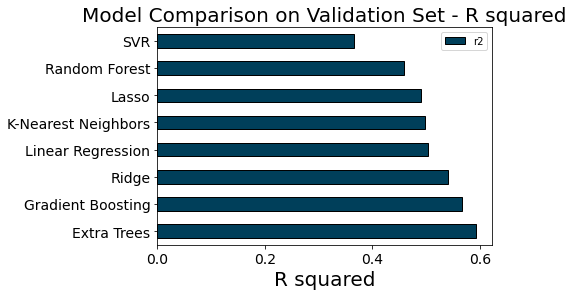

In [19]:
# Dataframe to hold the results
           
model_comparison = pd.DataFrame({'model': ['Linear Regression','Random Forest',
                                           'Extra Trees','Gradient Boosting',
                                           'Lasso', 'Ridge', 'SVR','K-Nearest Neighbors'],
                                 'r2': [linreg_r2, random_forest_r2, extra_trees_r2, 
                                         grad_boost_r2, lasso_r2, ridge_r2, svr_r2, knn_r2]})

# Horizontal bar chart of test r2
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = '#003f5a', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R squared'); plt.xticks(size = 14)
plt.title('Model Comparison on Validation Set - R squared', size = 20)
plt.savefig('../../reports/figures/model_compare.png')
plt.show();


### Results: 
#### Gradient Boosting Regressor returns the highest R-squared value at 0.578.

# Tune hyperparamters with Randomized Search CV

In [20]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

#### Check out Gradient Boosting best model

In [21]:
# Create the model to use for hyperparameter tuning
model_1 = GradientBoostingRegressor(random_state = 19)

# Set up the random search with 4-fold cross validation
random_cv_1 = RandomizedSearchCV(estimator=model_1,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'r2',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=19)

In [22]:
# Fit on the training data
random_cv_1.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [23]:
# Find the best combination of settings
random_cv_1.best_estimator_


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Evaluate model_1 - Gradient Boosting

In [24]:
model_1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


model_1_r2 = fit_and_eval(model_1)

# pickle this model for later use
pickle.dump(model_1, open('model_1', 'wb'))

print('Model_1 Performance on the validation set: R2 = %0.3f' % model_1_r2)

Model_1 Performance on the validation set: R2 = 0.594


In [25]:
feature_results = pd.DataFrame({'feature': list(X_train.columns), 
                                'importance': model_1.feature_importances_})

# Show the top 5 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head()

,feature,importance
0,high_school_5_year_graduation_rate_total,0.300172
1,high_school_dropout_rate_total,0.270871
2,student_attendance_rate,0.134243
3,number_student_enrollment,0.085829
4,student_chronic_truancy_rate,0.041920


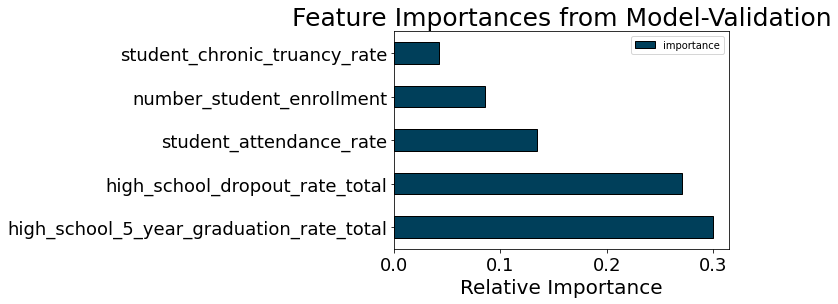

In [26]:
# Plot the 5 most important features in a horizontal bar chart
feature_results.loc[:4, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = '#003f5a');
plt.xlabel('Relative Importance'); plt.ylabel('')
plt.title('Feature Importances from Model-Validation')
plt.savefig('../../reports/figures/feature_importance.png')
plt.show();

# Evaluate on test set

In [27]:
# Select the best model
final_model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Make predictions on the test set using final model
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_pred)

print('Final Model Performance on the test set: R2 = %0.3f' % final_r2)

Final Model Performance on the test set: R2 = 0.659


# Final model performance has an R-squared score of 0.659.

So removing the categorical features did not improve the overall 

# Model interpretation

What does features importance tell us?



In [28]:
feature_results = pd.DataFrame({'feature': list(X_train_all.columns), 
                                'importance': final_model.feature_importances_})

# Show the top 5 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head()

NameError: name 'X_train_all' is not defined

In [ ]:
# Plot the 5 most important features in a horizontal bar chart
feature_results.loc[:4, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = '#003f5a');
plt.xlabel('Relative Importance'); plt.ylabel('')
plt.title('Feature Importances from Final Model')
plt.savefig('../../reports/figures/feature_importance.png')
plt.show();

##### Not surprisingly, 5-year graduation has the most importance, followed by droput rate.
In fact, the Top 5 here are almost identical to the top 5 correlations from EDA.
It is also worth noting that none of the categorial variables made the top 5.


### Future Improvement Items
I do want to try some additional feature selection and engineering, such as:
- including district level data: pupil to teacher ratio, for one.
- look at spending per student, or property tax information?

For better reproduction, I also want to write some code to filter and combine the data files more effeciently.